In [102]:
import pandas as pd  #import all libraries
import matplotlib.pyplot as plt 
df = pd.read_csv("/Users/jastisarika/Downloads/data_jobs.csv")  #load the csv file

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)

Analysing Data Science Job Demand


now we have original dataframe.. now filter with country usa  and make a copy of it by using copy method

In [103]:
df_usa = df[df["job_country"] =='United States'].copy()

In [104]:
df_usa.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [105]:
# now extract all the month values from the date column
df_usa["job_posted_month"] = df_usa["job_posted_date"].dt.strftime('%B')

In [106]:
df_usa.head()  # we have that new col in the end


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April


In [107]:
#now we need to pivot our data in order to get in a foramt neccessary to plot it speciafically i want to put job months in index, 
# and job_titles as columns , and we have to agg the count of jobpostings in the month

df_usa.pivot_table(index = 'job_posted_month',columns='job_title_short', aggfunc='size')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [108]:
#if we see the data above, job_postedmonth is not in order .. our main goal to arrange this in monthly order(chronological order) not alphabetival order
#so we need to add a  associated column to sort the months
#forst we will create df_pivoted setting it to another variable
df_usa_pivoted = df_usa.pivot_table(index = 'job_posted_month',columns='job_title_short', aggfunc='size')

In [109]:
df_usa_pivoted.reset_index(inplace = True)  #reset index 

In [110]:
#now create a new column to specify the 'number' of the job month 
df_usa_pivoted["month_number"] = pd.to_datetime(df_usa_pivoted['job_posted_month'],format="%B")

In [111]:
df_usa_pivoted["month_number"]= df_usa_pivoted["month_number"].dt.month   # as we see we got the month number along with the year , so extarct only th months by dt.month

In [112]:
df_usa_pivoted

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_number
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
2,December,648,40,3979,2641,3472,119,601,689,752,212,12
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
9,November,719,36,4531,2793,4175,132,656,684,816,194,11


In [113]:
df_usa_pivoted.sort_values('month_number', inplace=True)   #sort values by month number  and see that job_posted_month column is sorted chronoligically 
#now set_index 

In [114]:
df_usa_pivoted

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_number
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
11,September,897,50,4639,3224,4568,113,805,775,1014,228,9
10,October,932,48,5271,3015,4882,101,871,672,987,219,10


In [115]:
df_usa_pivoted.set_index('job_posted_month',inplace=True)  #now see, we got index acc to months and we can drop month_number column 

In [116]:
df_usa_pivoted.drop(columns='month_number',inplace=True)

In [117]:
df_usa_pivoted

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

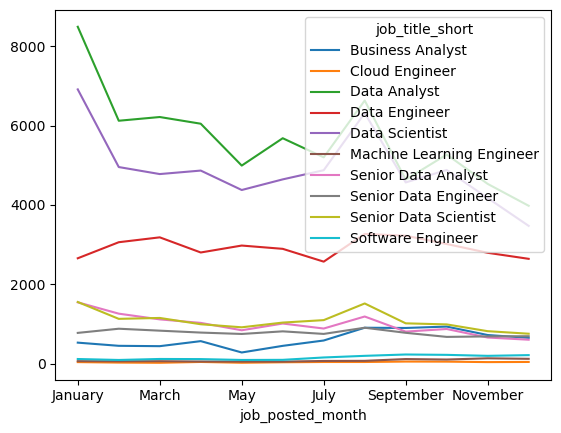

In [118]:
df_usa_pivoted.plot(kind = 'line')


In [119]:
#now i see it is a clutter, i dont understand anything from this,, lets make this chart only for top 3 jobs, lets make alist of top 3 
top_3 = df_usa["job_title_short"].value_counts().head(3)


In [120]:
top_3 =top_3.index.to_list()

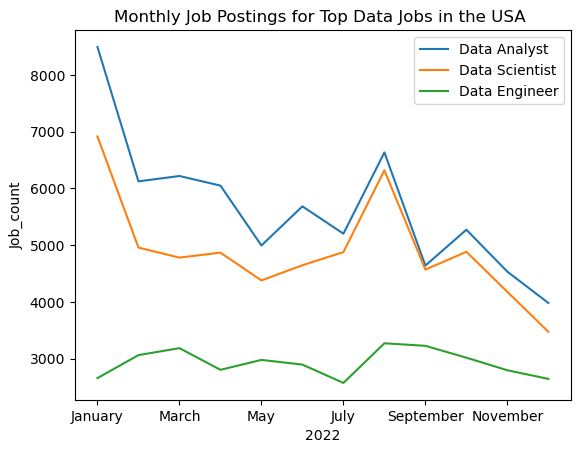

In [124]:
df_usa_pivoted[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the USA ')
plt.xlabel('2022')
plt.ylabel('Job_count')
plt.legend()
plt.show()


In [125]:
pd.read_csv("https://lukeb.co/software_csv")

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,13619,9827,5108,4348
1,February,11456,9116,7298,4284
2,March,11102,8178,5814,4159
3,April,14037,9209,7232,4220
4,May,12126,8864,6718,4980
5,June,12003,8065,5902,4781
6,July,11914,8061,6839,4344
7,August,11571,8191,7413,4104
8,September,14016,8447,6139,4094
9,October,11419,8476,5026,4389


In [126]:
%store df_usa_pivoted


Stored 'df_usa_pivoted' (DataFrame)
